### 1. Choper le code HTML de la page

In [65]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import re
import requests
import seaborn as sns

In [2]:
url = 'https://www.gnu.org/people/people.en.html'
response = requests.get(url)

### 2. Extraire le texte contenu dans `<h4>...</h4>`

In [3]:
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')
css_selector = 'h4'
raw_inner_texts = [elem.get_text() for elem in soup.select(css_selector)]
df = pd.DataFrame(raw_inner_texts, columns=['raw_inner_texts'])
df

,raw_inner_texts
0,Adam Bilbrough \n<abilbrou@gmail.com>
1,Adam Fedor <fedor@gnu.org>
2,Adam Spiers
3,Adrienne G. Thompson <agt@codeartnow.com>
4,Akim\nDemaille
...,...
245,Yann Dirson
246,Yngve Svendsen
247,Yoni Rabkin (aka yrk)
248,Yuchen Pei


### 3. Nettoyer

In [4]:
df.raw_inner_texts = df.raw_inner_texts.str.replace('\n', ' ')
df.raw_inner_texts = df.raw_inner_texts.str.replace('  ', ' ')
df

,raw_inner_texts
0,Adam Bilbrough <abilbrou@gmail.com>
1,Adam Fedor <fedor@gnu.org>
2,Adam Spiers
3,Adrienne G. Thompson <agt@codeartnow.com>
4,Akim Demaille
...,...
245,Yann Dirson
246,Yngve Svendsen
247,Yoni Rabkin (aka yrk)
248,Yuchen Pei


### 4. Extraire email et le sauvegarder à côté

In [21]:
df['email'] = ''
for i in df.index:
    cell = df.loc[i, 'raw_inner_texts']
    match = re.match(pattern=r".*<(.+)>.*", string=cell)
    if match:
        df.loc[i, 'email'] = match.group(1)
        df.loc[i, 'raw_inner_texts'] = re.sub(r'<.+>', '', cell).strip()

df


,raw_inner_texts,email
0,Adam Bilbrough,abilbrou@gmail.com
1,Adam Fedor,fedor@gnu.org
2,Adam Spiers,
3,Adrienne G. Thompson,agt@codeartnow.com
4,Akim Demaille,
...,...,...
245,Yann Dirson,
246,Yngve Svendsen,
247,Yoni Rabkin (aka yrk),
248,Yuchen Pei,


### 5. Extraire le prénom

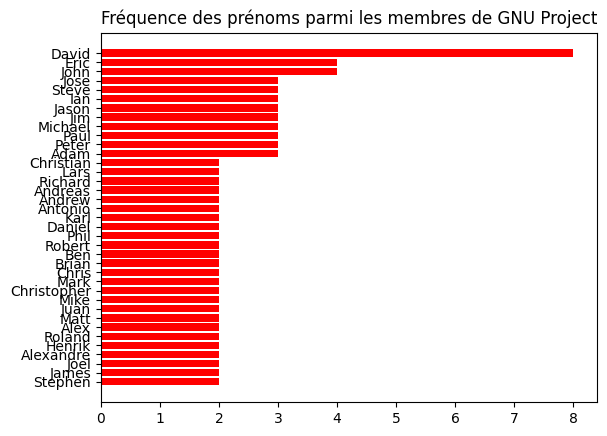

In [72]:
df['first_name'] = df.raw_inner_texts.apply(lambda x: x.split()[0].strip())

df_prénoms = df.groupby('first_name').size().to_frame(name='name_count').sort_values(by='name_count', ascending=True)
df_prénoms = df_prénoms[df_prénoms.name_count > 1]

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(df_prénoms.index, df_prénoms.name_count, color='red')
ax.set_title('Fréquence des prénoms parmi les membres de GNU Project')
plt.show()